In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./Mall_Customers.csv')

In [4]:
print(data.shape)
data.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.drop(columns=['CustomerID'], inplace=True)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

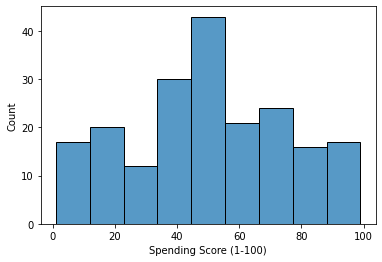

In [6]:
sns.histplot(data[data.columns[3]])

In [7]:
data.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [8]:
data.duplicated().sum()

0

In [9]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [10]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
numeric_transformer = Pipeline(steps=[
    ('standard', StandardScaler())
    ])

categorical_features = ['Gender']
categorical_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pre = Pipeline(steps=[('preprocessor', preprocessor)])

data_t = pd.DataFrame(pre.fit_transform(data))

In [11]:
data_t.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.0
1,-1.281035,-1.738999,1.195704,1.0
2,-1.352802,-1.700830,-1.715913,0.0
3,-1.137502,-1.700830,1.040418,0.0
4,-0.563369,-1.662660,-0.395980,0.0


In [12]:
from sklearn.cluster import KMeans

maxClusters=50

kmeans_test = [KMeans(n_clusters=i, n_init=10) for i in range(1, maxClusters)]
inertias = [kmeans_test[i].fit(data_t).inertia_ for i in range(len(kmeans_test))]

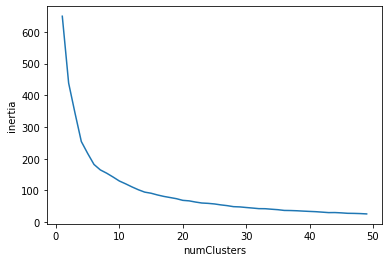

In [13]:
fig, ax = plt.subplots()

ax.plot(range(1, maxClusters), inertias)
plt.xlabel('numClusters')
plt.ylabel('inertia')
plt.show()

<AxesSubplot:ylabel='Count'>

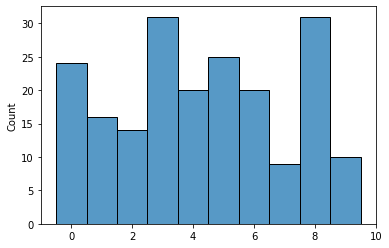

In [14]:
kmeans = KMeans(n_clusters=10, n_init=10)
clusters = kmeans.fit_predict(data_t)
sns.histplot(clusters, discrete=True)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

data_r = pd.DataFrame(pca.fit_transform(data_t), columns=['PC1','PC2','PC3'])
data_r['clusters'] = clusters
data_r.head()

,PC1,PC2,PC3,clusters
0,-0.600438,-1.737179,1.322247,0
1,-1.649886,-1.789124,0.067789,0
2,0.315381,-1.692772,2.179818,6
3,-1.477989,-1.781317,0.078518,0
4,-0.060545,-1.678691,0.688083,6


In [16]:
centers_r = pd.DataFrame(pca.transform(kmeans.cluster_centers_), columns=['PC1','PC2','PC3'])
centers_r.head()

,PC1,PC2,PC3
0,-1.362883,-1.385757,-0.036393
1,1.393980,0.832568,0.319288
2,-1.240770,1.596508,-0.458938
3,-0.691279,-0.190883,0.756175
4,1.345591,-0.225604,-1.308685


In [17]:
import plotly.express as px

fig = px.scatter_3d(data_r, x='PC1', y='PC2', z='PC3', color='clusters')#, size=2*np.ones(len(data_r['PC1'])))
fig.update_traces(marker=dict(size=5,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
fig.write_image("fig1.svg")
fig.write_image("fig1.pdf")

In [18]:
fig = px.scatter(data_r, x="PC1", y="PC2", color="clusters")

fig.update_traces(marker=dict(size=12,
                              color='rgba(135, 206, 250, 0.5)',
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

fig.write_image("fig2.svg")
fig.write_image("fig2.pdf")